In [1]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd

from matplotlib import pyplot as plt

from common import hallmark as hm

In [2]:
def calmi(path, hr=10, N=64):
    df = pd.read_csv(path, sep='\t')
    dt = (df.time_hr.iloc[-1] - df.time_hr.iloc[0] - hr) / N
    mi = []
    for i in range(N):
        t0  = df.time_hr[0] + i * dt
        sel = df[(t0 <= df.time_hr) & (df.time_hr < t0 + hr)]
        mi.append(np.std(sel.Fsum) / np.mean(sel.Fsum))
    return np.array(mi)

freq [8.6e+10 2.3e+11 1.4e+14]
beta [100.]
inc [179]
aspin [0.]
mag ['W']


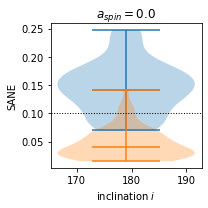

In [3]:
pf = hm.ParaFrame('cache/Ressler/{mag}a{aspin:g}_i{inc:d}/summ_beta{beta:g}_{freq:g}.tsv')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])
    
fig, axes = plt.subplots(1, 1, figsize=(3,3), sharex=True, sharey=True)

sel = pf(freq=2.3e11)

for c, a in enumerate(aspin):
    for r, m in enumerate(mag):
        mis = [calmi(sel(aspin=a)(mag=m)(inc=i).path.iloc[0]) for i in inc]
        axes.violinplot(mis, positions=inc, widths=25, showmedians=True)
        
        mis = [calmi(sel(aspin=a)(mag=m)(inc=i).path.iloc[0], hr=1) for i in inc]
        axes.violinplot(mis, positions=inc, widths=25, showmedians=True)

        axes.axhline(0.1, ls=':', linewidth=1, color='k')
    
        axes.set_title(f'$a_{{spin}} = {a}$')
        axes.set_xlabel('inclination $i$')
        axes.set_ylabel('MAD' if m == 'M' else 'SANE')
            
fig.tight_layout()
fig.savefig('output/plot/mi_Ressler.pdf')

freq [2.3e+11]
beta [1.]
inc [10 50 90]
f [0.5]
aspin [-0.94 -0.5   0.    0.5   0.94]
mag ['M' 'S']


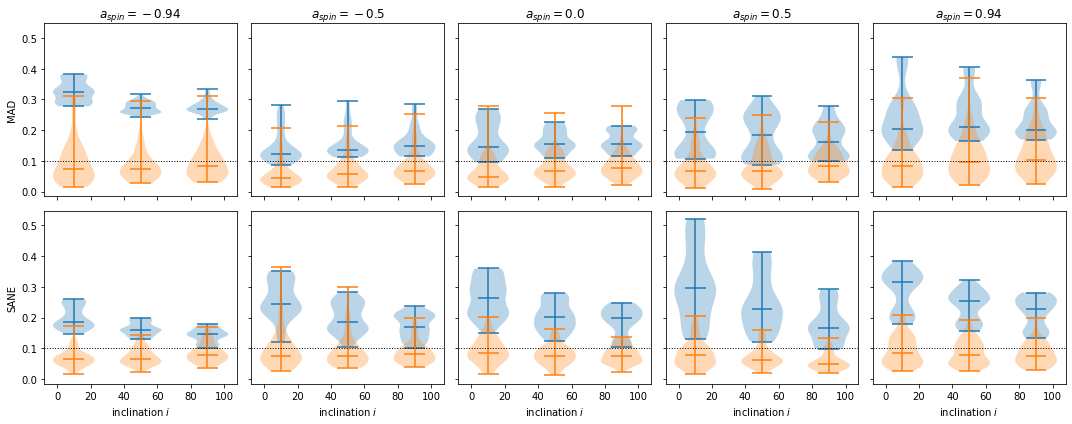

In [4]:
pf = hm.ParaFrame('cache/critical_beta/{mag}a{aspin:g}_i{inc:d}/summ_f{f:g}_b{beta:g}_{freq:g}.tsv')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])
    
fig, axes = plt.subplots(2, 5, figsize=(15,6), sharex=True, sharey=True)

sel = pf(freq=2.3e11)

for c, a in enumerate(aspin):
    for r, m in enumerate(mag):
        mis = [calmi(sel(aspin=a)(mag=m)(inc=i).path.iloc[0]) for i in inc]
        axes[r][c].violinplot(mis, positions=inc, widths=25, showmedians=True)

        mis = [calmi(sel(aspin=a)(mag=m)(inc=i).path.iloc[0], hr=1) for i in inc]
        axes[r][c].violinplot(mis, positions=inc, widths=25, showmedians=True)

        axes[r][c].axhline(0.1, ls=':', linewidth=1, color='k')
    
        if r == 0:
            axes[r][c].set_title(f'$a_{{spin}} = {a}$')
        elif r == 1:
            axes[r][c].set_xlabel('inclination $i$')
        if c == 0:
            axes[r][c].set_ylabel('MAD' if m == 'M' else 'SANE')
            
fig.tight_layout()
fig.savefig('output/plot/mi_critical_beta.pdf')

In [6]:
pf = hm.ParaFrame('cache/Illinois_thermal_w{win:d}/{mag}a{aspin:g}_i{inc:d}/summ_Rh{Rhigh:d}_{freq}.tsv')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])
    
sel = pf(freq='230GHz')

freq ['230GHz' '2um' '86GHz']
inc [ 10  30  50  70  90 110 130 150 170]
Rhigh [  1  10  40 160]
aspin [-0.94 -0.5   0.    0.5   0.94]
mag ['M' 'S']
win [3 4 5]


-0.94 M 1 5
-0.94 M 10 5
-0.94 M 40 5
-0.94 M 160 5
-0.94 S 1 5
-0.94 S 10 5
-0.94 S 40 5
-0.94 S 160 5
-0.5 M 1 5
-0.5 M 10 5
-0.5 M 40 5
-0.5 M 160 5
-0.5 S 1 5
-0.5 S 10 5
-0.5 S 40 5
-0.5 S 160 5
0.0 M 1 5
0.0 M 10 5
0.0 M 40 5
0.0 M 160 5
0.0 S 1 5
0.0 S 10 5
0.0 S 40 5
0.0 S 160 5
0.5 M 1 5
0.5 M 10 5
0.5 M 40 5
0.5 M 160 5
0.5 S 1 5
0.5 S 10 5
0.5 S 40 5
0.5 S 160 5
0.94 M 1 5
0.94 M 10 5
0.94 M 40 5
0.94 M 160 5
0.94 S 1 5
0.94 S 10 5
0.94 S 40 5
0.94 S 160 5


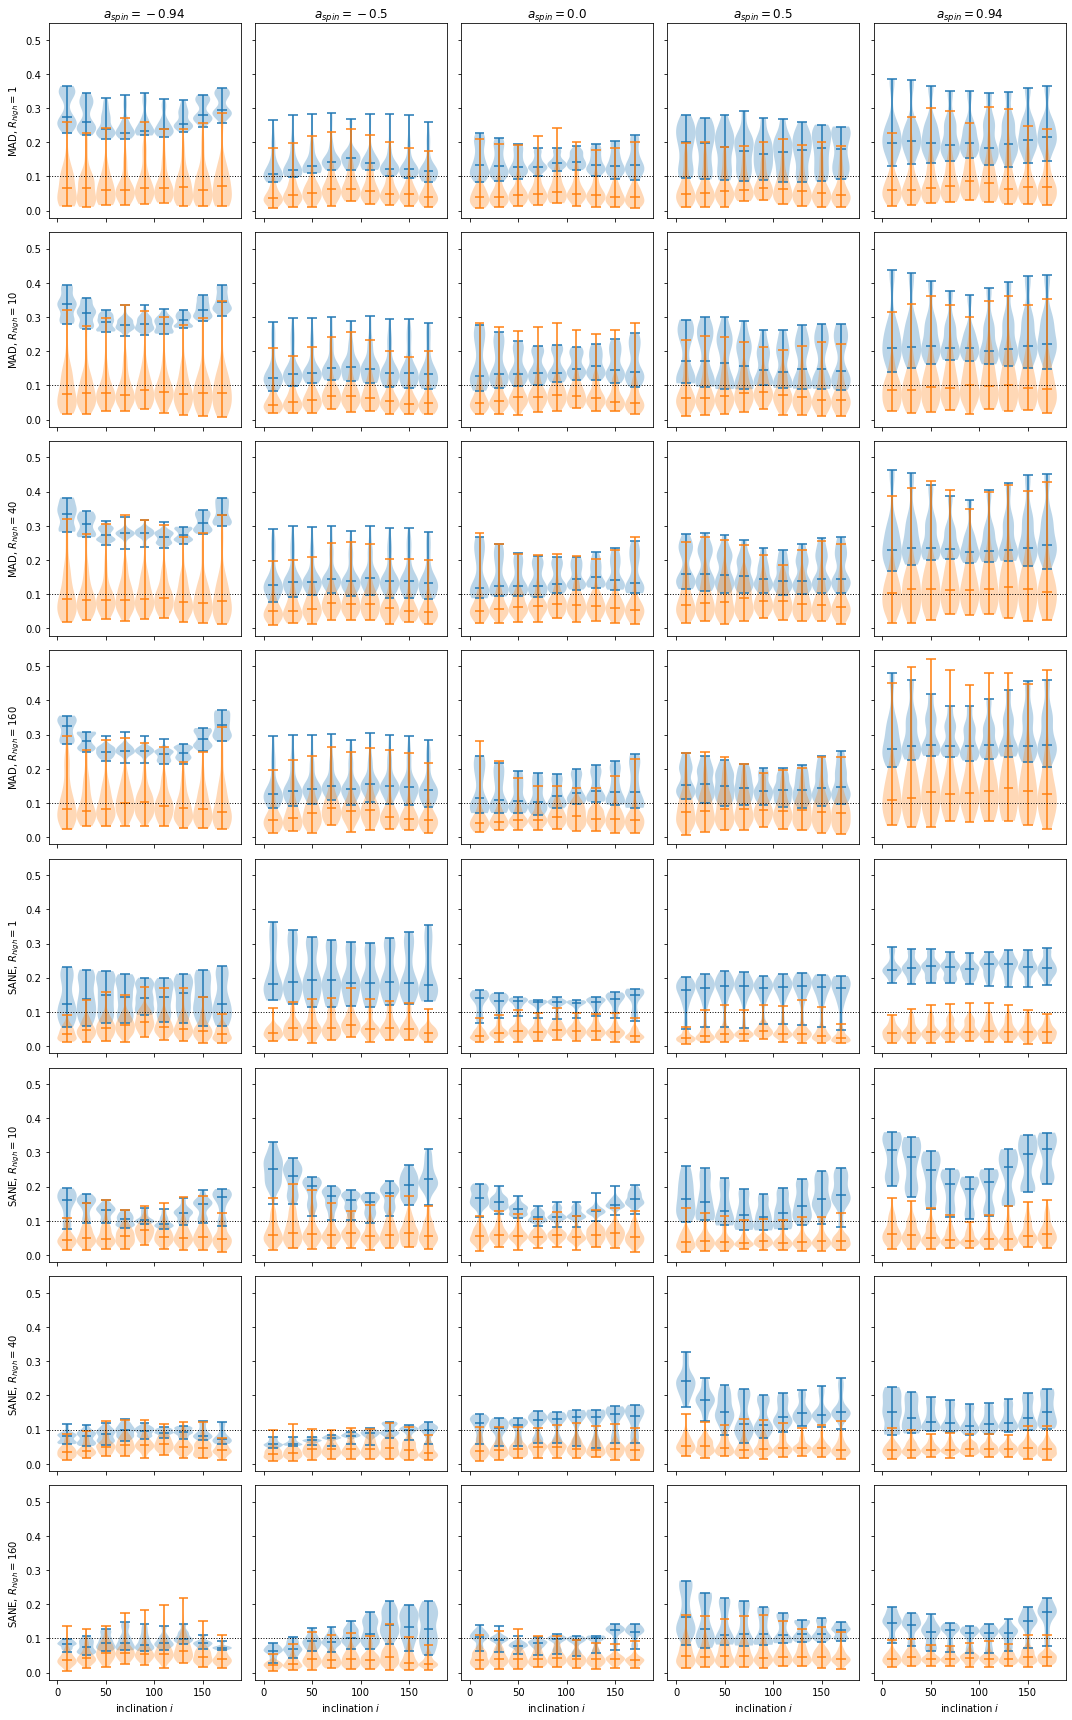

In [9]:
w = 5 # Adjust this amoug [3, 4, 5] to select different time windows

fig, axes = plt.subplots(8, 5, figsize=(15,24), sharex=True, sharey=True)

for c, a in enumerate(aspin):
    for r1, m in enumerate(mag):
        for r2, Rh in enumerate(Rhigh):
            print(a, m, Rh, w)
            r = r1 * 4 + r2
                
            mis = [calmi(sel(aspin=a)(mag=m)(Rhigh=Rh)(win=w)(inc=i).path.iloc[0]) for i in inc]
            axes[r][c].violinplot(mis, positions=inc, widths=20, showmedians=True)

            mis = [calmi(sel(aspin=a)(mag=m)(Rhigh=Rh)(win=w)(inc=i).path.iloc[0], hr=1) for i in inc]
            axes[r][c].violinplot(mis, positions=inc, widths=20, showmedians=True)

            axes[r][c].axhline(0.1, ls=':', linewidth=1, color='k')
    
            if r == 0:
                axes[r][c].set_title(f'$a_{{spin}} = {a}$')
            elif r == 7:
                axes[r][c].set_xlabel('inclination $i$')
            if c == 0:
                axes[r][c].set_ylabel(f'{"MAD" if m == "M" else "SANE"}, $R_{{high}} = {Rh}$')
            
fig.tight_layout()
fig.savefig(f'output/plot/mi_Illinois_thermal_w{w}.pdf')